In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
# Load R magic
%load_ext rpy2.ipython

In [154]:
%%R
library(ggplot2)
library(ggthemes)
library(RColorBrewer)
library(stringr)
# library(tidyverse)
library(grid)
library(gridExtra)

# blues = brewer.pal(n = 6, "Blues")[4:6]
# plot_theme <- theme_hc() + theme(legend.title=element_blank(), 
#                                 legend.position="right", 
#                                 legend.text=element_text(size=12))

In [4]:
import pandas as pd

In [19]:
cdf_df_single = pd.read_csv('data/single-core-completions/5-level-single.csv', sep=',', header=None, names=['Duration'])
cdf_df_single['Scheme'] = 'Single Core'
cdf_df_mem = pd.read_csv('data/6-22-19/completion_times/5-level-mem.csv', sep=',', header=None, names=['Duration'])
cdf_df_mem['Scheme'] = 'Memory'
cdf_df_ddio = pd.read_csv('data/6-22-19/completion_times/5-level-ddio.csv', sep=',', header=None, names=['Duration'])
cdf_df_ddio['Scheme'] = 'DDIO'
cdf_df_reg = pd.read_csv('data/6-22-19/completion_times/5-level-reg.csv', sep=',', header=None, names=['Duration'])
cdf_df_reg['Scheme'] = 'L-NIC'
cdf_df_reg_offload = pd.read_csv('data/6-22-19/completion_times/5-level-reg-offload.csv', sep=',', header=None, names=['Duration'])
cdf_df_reg_offload['Scheme'] = 'L-NIC with Offload'

cdf_df = pd.concat([cdf_df_single, cdf_df_mem, cdf_df_ddio, cdf_df_reg, cdf_df_reg_offload])

In [20]:
cdf_df['Duration'] = cdf_df['Duration']/float(1000)

In [21]:
cdf_df.describe()

,Duration
count,4117.000000
mean,90.367777
std,106.662418
min,0.107000
25%,26.393000
50%,42.447000
75%,122.665000
max,1230.640000


In [22]:
cdf_df.head()

,Duration,Scheme
0,63.046,Single Core
1,181.943,Single Core
2,118.437,Single Core
3,154.534,Single Core
4,242.810,Single Core


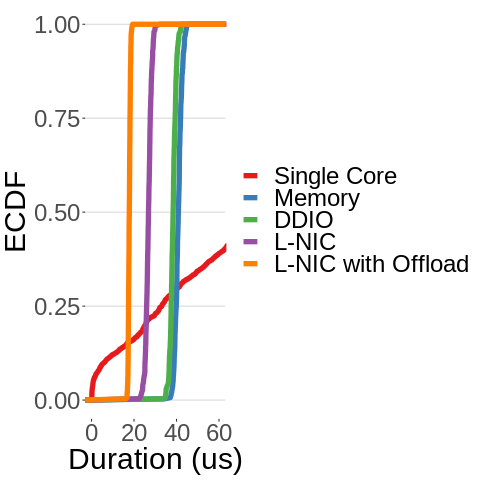

In [171]:
%%R -i cdf_df
cdf_df$Scheme <- factor(cdf_df$Scheme, levels = c("Single Core", "Memory", "DDIO", "L-NIC", "L-NIC with Offload"))

ggplot(cdf_df, aes(x=Duration, colour=Scheme)) + 
    geom_line(stat = "ecdf", size=2.5) +
    coord_cartesian(xlim = c(0, 60)) +
    labs(y = "ECDF", x = "Duration (us)") +
    theme_hc(base_size = 30) +
    theme(legend.position = "right", legend.title = element_blank()) +
    scale_colour_brewer(palette = "Set1")

In [115]:
%%R -i cdf_df
ggsave("completion-cdfs.pdf", width = 12, height = 4)

In [139]:
ct50_df_dma = pd.read_csv('data/6-22-19/completion_times/mem-stats-50p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct50_df_dma['Scheme'] = 'DMA'
ct50_df_dma['Perc'] = '50th'
ct50_df_ddio = pd.read_csv('data/6-22-19/completion_times/ddio-stats-50p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct50_df_ddio['Scheme'] = 'DDIO'
ct50_df_ddio['Perc'] = '50th'
ct50_df_reg = pd.read_csv('data/6-22-19/completion_times/reg-stats-50p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct50_df_reg['Scheme'] = 'L-NIC (200)'
ct50_df_reg['Perc'] = '50th'
ct50_df_reg_offload = pd.read_csv('data/6-22-19/completion_times/reg-offload-stats-50p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct50_df_reg_offload['Scheme'] = 'L-NIC (200) with Offload'
ct50_df_reg_offload['Perc'] = '50th'

ct99_df_dma = pd.read_csv('data/6-22-19/completion_times/mem-stats-99p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct99_df_dma['Scheme'] = 'DMA'
ct99_df_dma['Perc'] = '99th'
ct99_df_ddio = pd.read_csv('data/6-22-19/completion_times/ddio-stats-99p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct99_df_ddio['Scheme'] = 'DDIO'
ct99_df_ddio['Perc'] = '99th'
ct99_df_reg = pd.read_csv('data/6-22-19/completion_times/reg-stats-99p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct99_df_reg['Scheme'] = 'L-NIC (200)'
ct99_df_reg['Perc'] = '99th'
ct99_df_reg_offload = pd.read_csv('data/6-22-19/completion_times/reg-offload-stats-99p.csv', sep=',', header=None, names=['Depth', 'CompletionTime'])
ct99_df_reg_offload['Scheme'] = 'L-NIC (200) with Offload'
ct99_df_reg_offload['Perc'] = '99th'

ct50_df = pd.concat([ct50_df_dma, ct50_df_ddio, ct50_df_reg, ct50_df_reg_offload])
ct99_df = pd.concat([ct99_df_dma, ct99_df_ddio, ct99_df_reg, ct99_df_reg_offload])
ct_df = pd.concat([ct50_df, ct99_df])

In [140]:
ct50_df['CompletionTime'] = ct50_df['CompletionTime'] / float(1000)
ct99_df['CompletionTime'] = ct99_df['CompletionTime'] / float(1000)
ct_df['CompletionTime'] = ct_df['CompletionTime'] / float(1000)

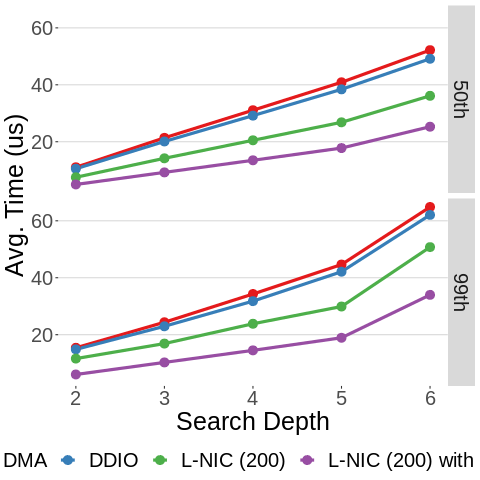

In [141]:
%%R -i ct_df
ct_df$Scheme <- factor(ct_df$Scheme, levels = c("DMA", "DDIO", "L-NIC (200)", "L-NIC (200) with Offload"))

ggplot(ct_df, aes(y=CompletionTime, x=Depth, colour=Scheme)) + 
    geom_line(size=1.5) +
    geom_point(size=4) +
    facet_grid(factor(Perc) ~ .) +
    labs(y = "Avg. Time (us)", x = "Search Depth") +
    theme_hc(base_size = 25) +
    theme(legend.position = "bottom", legend.title = element_blank()) +
    scale_colour_brewer(palette = "Set1")

In [142]:
%%R -i cdf_df
ggsave("completion-lvls.pdf", width = 12, height = 4)

In [181]:
%%R -i ct50_df
ct_df$Scheme <- factor(ct50_df$Scheme, levels = c("DMA", "DDIO", "L-NIC (200)", "L-NIC (200) with Offload"))

p1 <- ggplot(ct50_df, aes(y=CompletionTime, x=Depth, colour=Scheme, linetype=Scheme)) + 
    geom_line(size=1.5) +
    geom_point(size=4) +
    labs(y = "50% Time (us)", x = element_blank()) +
    theme_hc(base_size = 30) +
    theme(legend.position = "none", legend.title = element_blank()) +
    scale_colour_brewer(palette = "Set1")

In [182]:
%%R -i ct99_df
ct_df$Scheme <- factor(ct99_df$Scheme, levels = c("DMA", "DDIO", "L-NIC (200)", "L-NIC (200) with Offload"))

p2 <- ggplot(ct99_df, aes(y=CompletionTime, x=Depth, colour=Scheme, linetype=Scheme)) + 
    geom_line(size=1.5) +
    geom_point(size=4) +
    labs(y = "99% Time (us)", x = "Search Depth") +
    theme_hc(base_size = 30) +
    theme(legend.position = "bottom", legend.title = element_blank()) +
    scale_colour_brewer(palette = "Set1")

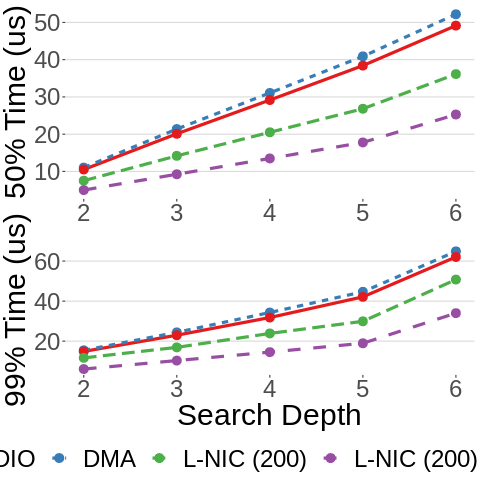

In [183]:
%%R
combined <- grid.arrange(p1, p2, nrow=2)
ggsave(combined, height=8, width=12, file="completion-lvls.pdf")